In [ ]:
# load dataset 
import pandas as pd
df=pd.read_csv('/content/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
# check for null values
df.isnull().sum()


,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


<Axes: >

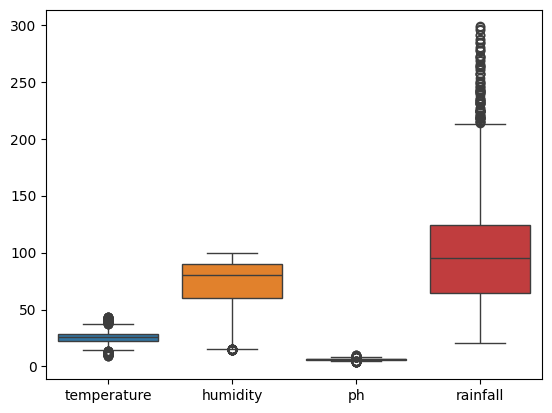

In [ ]:
# Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df[['temperature','humidity','ph','rainfall']])

In [ ]:
# Encode categorical labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x=df.drop('label',axis=1)
y=df['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

by decision tree

In [ ]:
# Train a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt.predict(x_test)

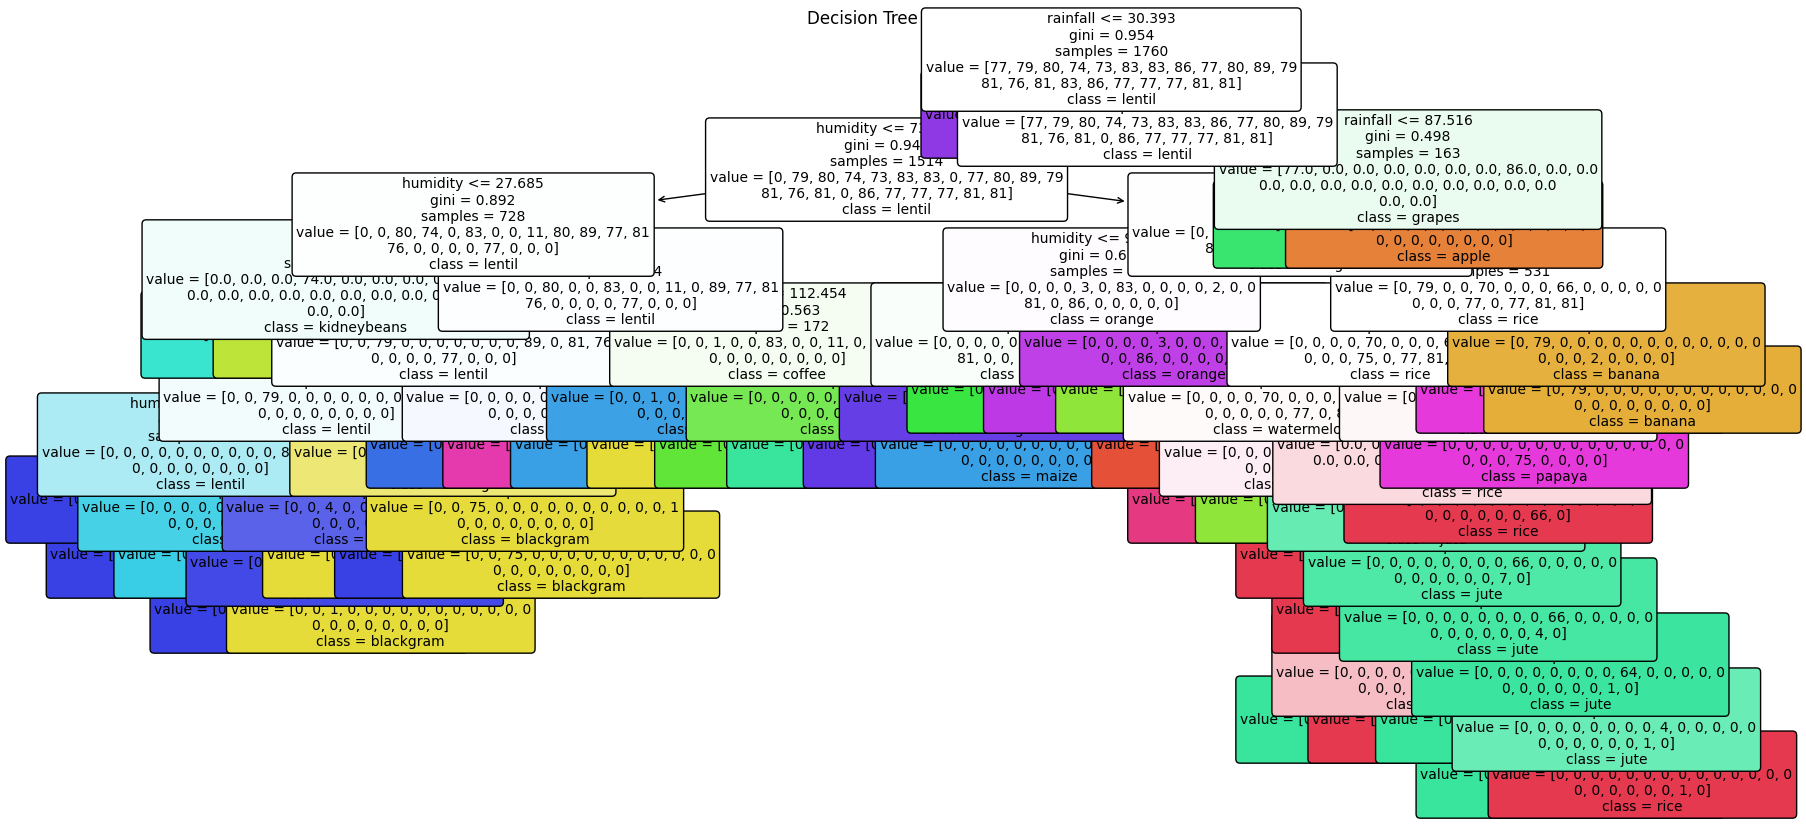

In [ ]:
# Evaluate the model
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=x.columns, class_names=le.classes_, rounded=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

In [ ]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)


0.9886363636363636


In [ ]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(x_test)

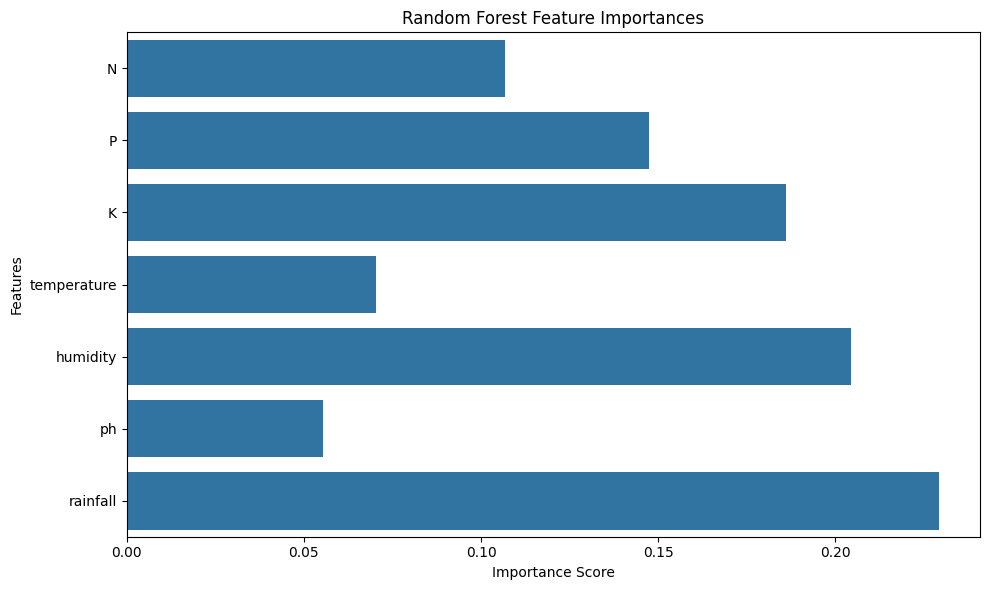

In [ ]:
# Visualize feature importances
import seaborn as sns
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = x.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
# Calculate accuracy for Random Forest
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9931818181818182


In [ ]:
# Predicting a crop based on input features
import numpy as np
input_data=np.array([[90,40,40,25,80,6.5,200]])
prediction=rf.predict(input_data)
result=le.inverse_transform(prediction)
print("Recommended Crop:", result[0])

Recommended Crop: rice


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Predicting multiple crops based on different inputs
import numpy as np

test_inputs = np.array([
    [90, 40, 40, 25, 80, 6.5, 200],
    [60, 55, 50, 32, 70, 5.5, 110],
    [40, 30, 35, 20, 40, 6.0, 100]
])

predictions = rf.predict(test_inputs)
decoded = le.inverse_transform(predictions)

for i, crop in enumerate(decoded):
    print(f"Input {i+1}: Recommended Crop → {crop}")

Input 1: Recommended Crop → rice
Input 2: Recommended Crop → maize
Input 3: Recommended Crop → mango


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Save the trained models for future use
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# example training
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

dt_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)

# save both models
with open('dt_crop_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

with open('rf_crop_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)